# Task: To explore Business Analytics

Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore.
You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the data
data = pd.read_csv(r"C:\Users\asus\Downloads\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#checking for null values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#data before removing duplicates value
data.shape

(9994, 13)

In [10]:
data.drop_duplicates(keep="first",inplace=True)

In [11]:
#data after removing duplicate values
data.shape

(9977, 13)

# Visualization of data

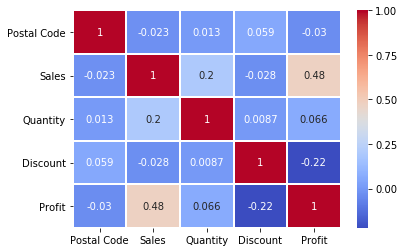

In [12]:
sns.heatmap(data.corr(),linewidths=1,annot=True,square=False,cmap="coolwarm")

In [15]:
country=data['Country']
country.describe()

count              9977
unique                1
top       United States
freq               9977
Name: Country, dtype: object

In [16]:
city=data['City']
city.describe()

count              9977
unique              531
top       New York City
freq                914
Name: City, dtype: object

In [17]:
category=data["Category"]
category.describe()

count                9977
unique                  3
top       Office Supplies
freq                 6012
Name: Category, dtype: object

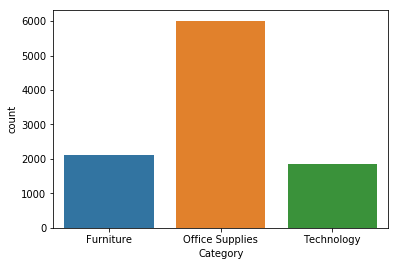

In [18]:
sns.countplot(data['Category'])
plt.show()

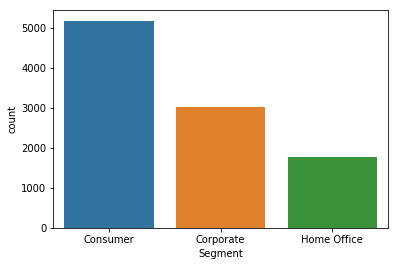

In [19]:
sns.countplot(data['Segment'])
plt.show()

In [20]:
#Removing outliners
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [21]:
remove_outlier(data)

In [22]:
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


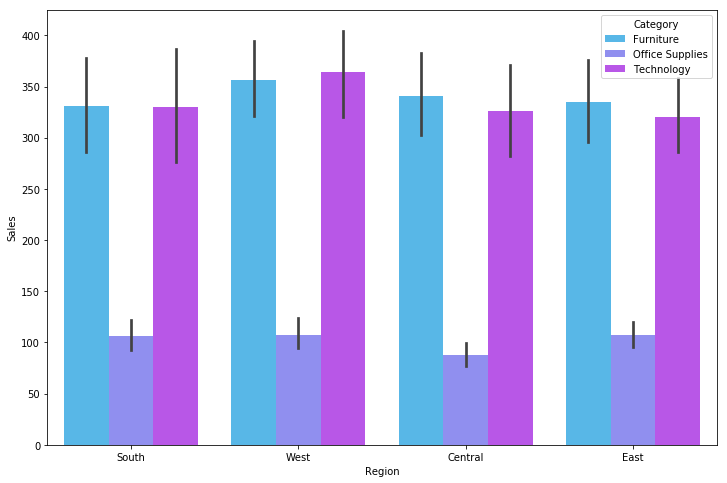

In [25]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="cool")

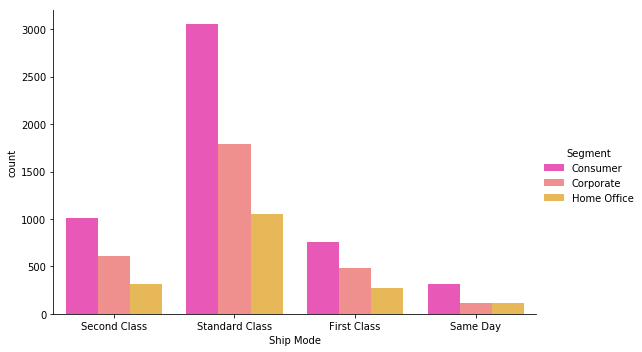

In [26]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="spring")

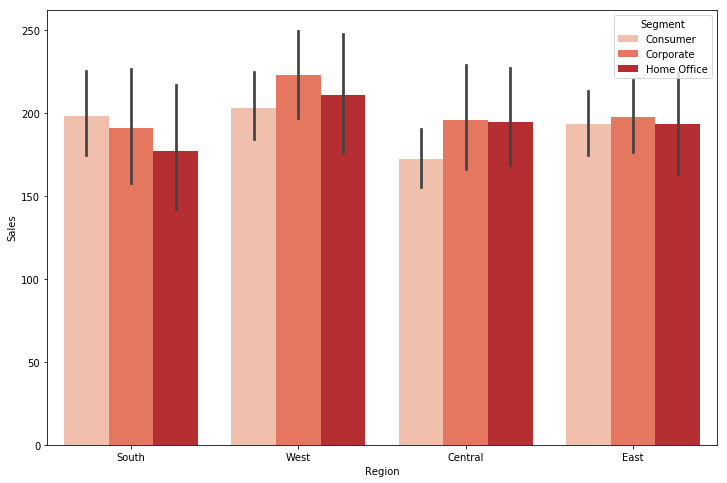

In [27]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Reds")

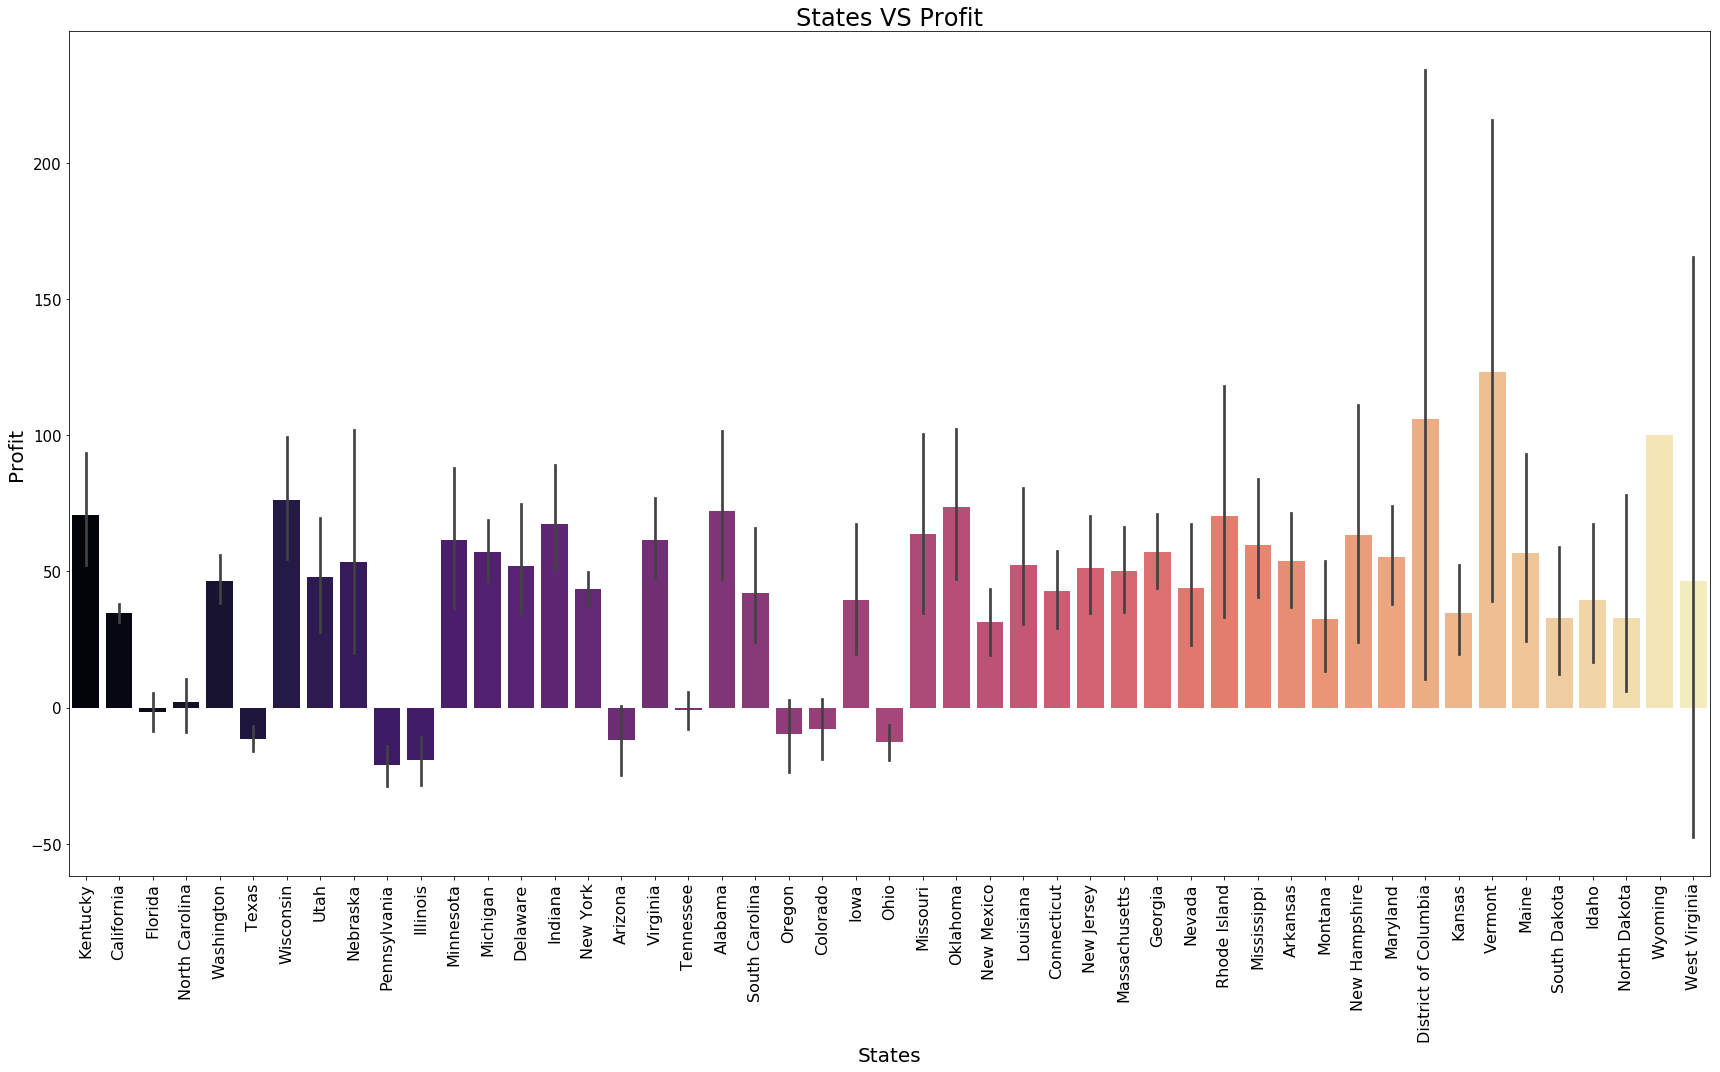

In [29]:
#State wise profit
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="magma",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

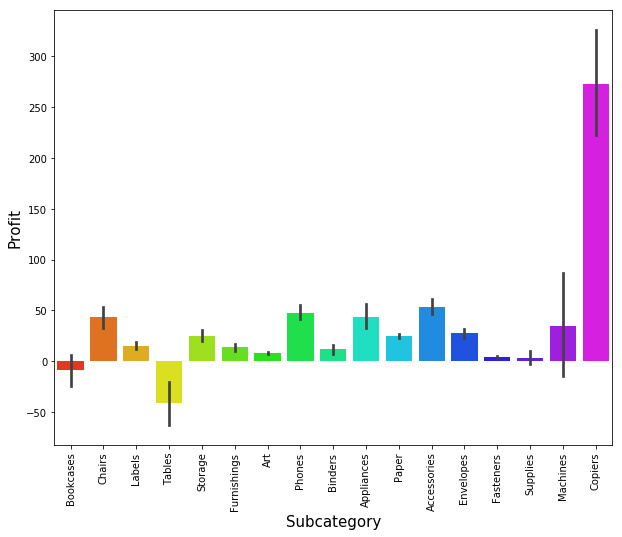

In [31]:
#subcategory wise profit
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="gist_rainbow")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Conclusion

Generally people buy items in 2 or 4 quantity , this signifies that most stores are in residential areas where families live and buy their essentials.

There is not much difference in sales on the basis of Segments for any region. Overall 'Corporate' is leading a bit.

In every region sale of office supplies is low as compared to furniture and technology

District of Columbia', 'Vermont','Wyoming' states are generating highest profits. And States like 'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' are generating losses. Hence focus has to be given in such States.


'Copiers' are gaining huge profit. But 'Tables' and 'Bookcases' are going with loss. Respective steps are to be taken to improve the business in these Subcategories.